In [97]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from plotly import express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, r2_score
from sklearn.decomposition import PCA
import re # regex
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, ShuffleSplit, cross_validate



<p style="font-size: 16px;">For this lab we will build a model on customer churn binary classification problem. You will be using&nbsp;<a href="https://drive.google.com/file/d/1C58ntdJEsDIPt0a0FKUWeqTQ-2A8KnHw/view?usp=share_link" target="[object Object]">DATA_Customer-Churn&nbsp;</a>file that you can find in this&nbsp;<a href="https://drive.google.com/file/d/1C58ntdJEsDIPt0a0FKUWeqTQ-2A8KnHw/view?usp=share_link" target="[object Object]">LINK</a>.</p>
<p style="font-size: 16px;"><strong>Scenario</strong></p>
<p style="font-size: 16px;">You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.</p>
<p style="font-size: 16px;"><strong>Instructions</strong></p>
<p style="font-size: 16px;">In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class. Here is the list of steps to be followed (building a simple model without balancing the data):</p>
<p style="font-size: 16px;"><strong>Round 1</strong></p>
<ul>
<li>&nbsp;Import the required libraries and modules that you would need.</li>
<li>Read that data into Python and call the dataframe churnData.</li>
<li>Check the datatypes of all the columns in the data.You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.</li>
<li>Check for null values in the dataframe. Replace the null values.</li>
<li>Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:</li>
<ul>
<li>Split the data into a training set and a test set.</li>
<li>Scale the features either by using MinMaxScaler or a standard scaler.</li>
</ul>
<li>(Optional) Encode the categorical variables so you can use them for modeling later.</li>
</ul>
<p style="font-size: 16px;"><strong>Round 2</strong></p>
<ul>
<li>(Optional) Fit a logistic Regression model on the training data.</li>
<li>Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.</li>
<li>Fit a Decision Tree Classifier on the training data.</li>
<li>Compare the accuracy, precision, recall for&nbsp;the previous models on both the train and test sets.</li>
</ul>
<p style="font-size: 16px;"><strong>Round 3</strong></p>
<ul>
<li>apply K-fold cross validation on your models&nbsp;built before,&nbsp;&nbsp;and check the model score. Note: So far we have not balanced the data.</li>
</ul>
<p style="font-size: 16px;"><strong>Round 4</strong></p>
<ul>
<li>fit a Random forest Classifier on the data and compare the accuracy.</li>
<li>tune the hyper parameters with Gridsearch and check the results. retrain the final mode with the best parameters found.</li>
</ul>
<p style="font-size: 16px;"><strong>Managing imbalance in the dataset</strong></p>
<ul>
<li>Check for the imbalance.</li>
<li>Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.</li>
<li>Each time fit the model and&nbsp;check&nbsp;the accuracy of the model.</li>
</ul>


In [98]:
data = pd.read_csv("DATA_Customer-Churn.txt")

In [99]:
data_c = {'Customer-Churn': data}

def print_exploratory(data):
    print("Data shape: \n")
    for name, d in data.items():
        num_rows, num_columns = d.shape
        print(f'Shape of "{name}" : {num_columns} columns, {num_rows} rows')
    print("\n Duplicates:\n")
    for name, d in data.items():
        num_duplicates = d.duplicated().sum()
        print(f'Number of duplicates in "{name}" : {num_duplicates} duplicates')
    print("\n")
    for name, d in data.items():    
        unique_v = d.nunique()
        print(f'Unique Values "{name}":\n{unique_v}\n')
    for name, d in data.items():    
        typ = d.dtypes
        print(f'Data Type "{name}":\n{typ}\n')
    for name, d in data.items():    
        empty = d.isna().sum()
    for name, d in data.items():
        num_columns = d.select_dtypes(np.number).columns
        str_columns = d.select_dtypes(object).columns
        print(f'Numerical Columns "{name}": \n{num_columns}\n ')
        print(f'Non numerical Columns "{name}": \n{str_columns}\n ')
        

print_exploratory(data_c)


Data shape: 

Shape of "Customer-Churn" : 16 columns, 7043 rows

 Duplicates:

Number of duplicates in "Customer-Churn" : 49 duplicates


Unique Values "Customer-Churn":
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Data Type "Customer-Churn":
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      floa

In [100]:
data.drop_duplicates(inplace=True)
data.columns = data.columns.str.lower()
data.head()
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')
data['totalcharges'].isna().sum()
data.dropna(subset=['totalcharges'], inplace=True)
data_type = data['totalcharges'].dtype
print(f"The data type of 'column_name' is: {data_type}")

The data type of 'column_name' is: float64


In [101]:
mapping = {'Yes': "1", 'No': "0"}
columns_map = ["partner", "dependents", "phoneservice", "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies", "churn"]

# Apply mapping and fill missing values with the original values
data[columns_map] = data[columns_map].replace(mapping).fillna(data[columns_map])

data[columns_map]


,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,churn
0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1
3,0,0,0,1,0,1,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,0
7040,1,1,0,1,0,0,0,0,0,0
7041,1,0,1,0,0,0,0,0,0,1


In [102]:
def data_dummy(data): # handling gender
    data_copy = data.copy()
    data_dummy = pd.get_dummies(data_copy, drop_first=True)
    print(data_dummy.dtypes)
    print(f"columns: \n{data_dummy.columns}")
    return data_dummy

data = data_dummy(data)
data

seniorcitizen                             int64
tenure                                    int64
monthlycharges                          float64
totalcharges                            float64
gender_Male                                bool
partner_1                                  bool
dependents_1                               bool
phoneservice_1                             bool
onlinesecurity_1                           bool
onlinesecurity_No internet service         bool
onlinebackup_1                             bool
onlinebackup_No internet service           bool
deviceprotection_1                         bool
deviceprotection_No internet service       bool
techsupport_1                              bool
techsupport_No internet service            bool
streamingtv_1                              bool
streamingtv_No internet service            bool
streamingmovies_1                          bool
streamingmovies_No internet service        bool
contract_One year                       

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_1,dependents_1,phoneservice_1,onlinesecurity_1,onlinesecurity_No internet service,...,deviceprotection_No internet service,techsupport_1,techsupport_No internet service,streamingtv_1,streamingtv_No internet service,streamingmovies_1,streamingmovies_No internet service,contract_One year,contract_Two year,churn_1
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,1889.50,True,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0,2,53.85,108.15,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,True,False,...,False,True,False,True,False,True,False,True,False,False
7039,0,72,103.20,7362.90,False,True,True,True,False,False,...,False,False,False,True,False,True,False,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7041,1,4,74.40,306.60,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [103]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

X= data[["tenure", "seniorcitizen", "monthlycharges", "totalcharges"]]
y= data["churn_1"]


def split_scaler_data(X, y):
    print(X.head())
    print(y.head())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=7986)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_scaler_data(X, y)


results = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1_score', 'false_negatives'])



def fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results):
    # fit predicts and evalueate model and add results to a table results
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Recall
    #(y_pred & y_test).sum() / y_test.sum()
    print(f"score: {score}")
    print(f"accuracy score: {accuracy}")
    print(f"precision_score: {precision}")
    print(f"recall_score: {recall}")
    confusion_matr = confusion_matrix(y_test, y_pred)
    print((y_pred & y_test).sum())
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    disp = ConfusionMatrixDisplay(confusion_matr, display_labels=model.classes_)
    disp.plot(ax=ax1)
    ax1.set_title('Confusion Matrix')
    
    #model_evaluation:
    f1 = f1_score(y_test, y_pred)
    false_negatives = confusion_matr[1][0]
    new_result = pd.DataFrame({'model_name': model_name, 'accuracy': accuracy, 'precision':precision,'recall':recall,'f1_score':f1,'false_negatives':false_negatives},index=[0])   
    results = pd.concat([results, new_result],axis=0)
    print_y_score(model_name, X_test, y_test)
    return accuracy, precision, recall, y_pred, results


def print_y_score(model_name, X_test, y_test):
    Y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_score)
    plt.title(f"ROC curve for {model_name}")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(fpr, tpr);

# print_y_score(model_name, X_test, y_test)

   tenure  seniorcitizen  monthlycharges  totalcharges
0       1              0           29.85         29.85
1      34              0           56.95       1889.50
2       2              0           53.85        108.15
3      45              0           42.30       1840.75
4       2              0           70.70        151.65
0    False
1    False
2     True
3    False
4     True
Name: churn_1, dtype: bool


In [117]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def evaluate_model(model, X, y, cv, scoring_metrics):
    results = {}

    for metric in scoring_metrics:
        if metric == 'precision_score':
            # Calculate precision scores manually
            precision_scores = []
            for train_idx, test_idx in cv.split(X, y):
                model.fit(X.iloc[train_idx], y.iloc[train_idx])
                y_pred = model.predict(X.iloc[test_idx])
                precision = precision_score(y.iloc[test_idx], y_pred)
                precision_scores.append(precision)
            mean_precision = sum(precision_scores) / len(precision_scores)
            results['precision_score'] = mean_precision
            print(f"Precision Score: {mean_precision:.4f}")
        else:
            # Use cross_val_score for other metrics
            scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
            mean_score = scores.mean()
            results[metric] = mean_score
            print(f"{metric}: {mean_score:.4f}")

    return results

# Assuming you have features X and target y
X = data[["tenure", "seniorcitizen", "monthlycharges", "totalcharges"]]
y = data["churn_1"]

# Create models
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()

# List of models
models = [model_dt, model_knn, model_lr]

# Specify the number of folds (e.g., 5)
num_folds = 5

# Create a stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Specify the scoring metrics you want to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Loop through each model and evaluate
for model in models:
    print(f"Evaluating Model: {type(model).__name__}")
    results = evaluate_model(model, X, y, cv, scoring_metrics)
    print("\n")


Evaluating Model: DecisionTreeClassifier
accuracy: 0.7199
precision: 0.4717
recall: 0.4632
f1: 0.4635


Evaluating Model: KNeighborsClassifier
accuracy: 0.7603
precision: 0.5620
recall: 0.4324
f1: 0.4887


Evaluating Model: LogisticRegression
accuracy: 0.7916
precision: 0.6544
recall: 0.4546
f1: 0.5361




score: 0.7924123120973514
accuracy score: 0.7924123120973514
precision_score: 0.6504065040650406
recall_score: 0.43956043956043955
160


C:\Users\rober\AppData\Local\Temp\ipykernel_2060\2186810863.py:54: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

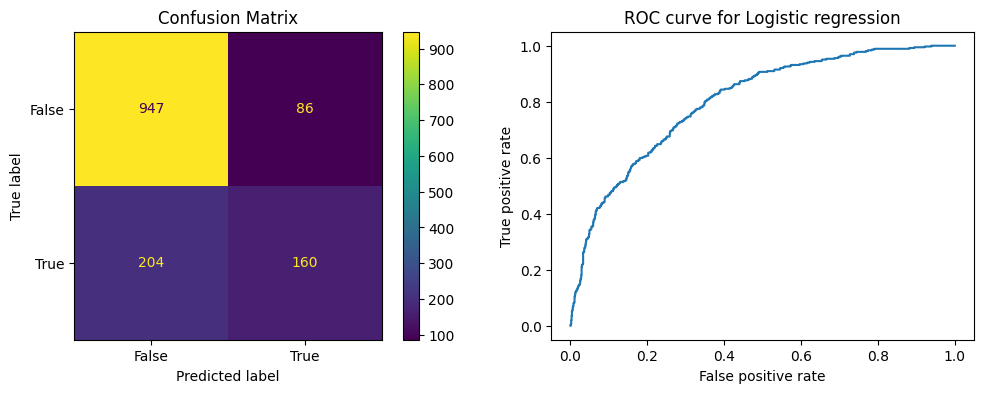

In [104]:
model_name = "Logistic regression"
model_lr = LogisticRegression()
accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model_lr, X_train, X_test, y_train, y_test, results)
results
score = r2_score(y_test, y_pred)
print(score)



score: 0.768790264853257
accuracy score: 0.768790264853257
precision_score: 0.5714285714285714
recall_score: 0.45054945054945056
164


,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.792412,0.650407,0.439560,0.52459,204
0,KNeighborsClassifier(KNN5),0.768790,0.571429,0.450549,0.50384,200


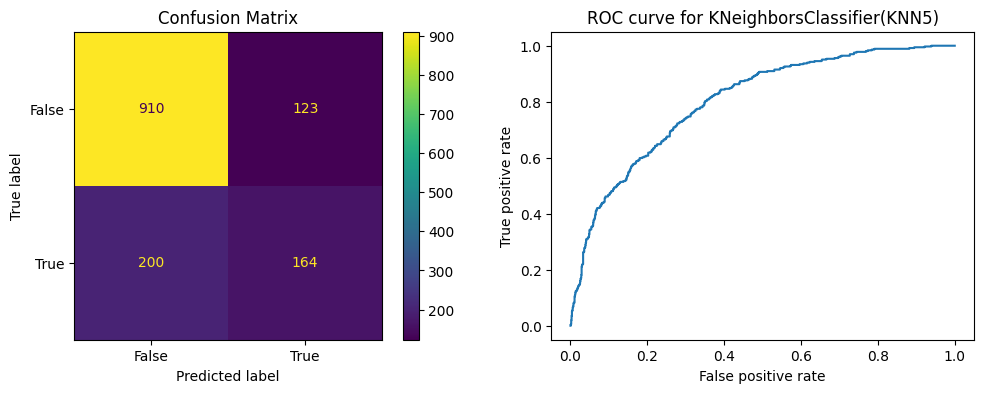

In [105]:
#Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.</li>
model_knn = KNeighborsClassifier(n_neighbors=5)
model_name = "KNeighborsClassifier(KNN5)"
accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model_knn, X_train, X_test, y_train, y_test, results)
results

score: 0.7823908375089478
accuracy score: 0.7823908375089478
precision_score: 0.6086956521739131
recall_score: 0.46153846153846156
168


,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.792412,0.650407,0.439560,0.52459,204
0,KNeighborsClassifier(KNN5),0.768790,0.571429,0.450549,0.50384,200
0,DecisionTreeClassifier(MD5),0.782391,0.608696,0.461538,0.52500,196


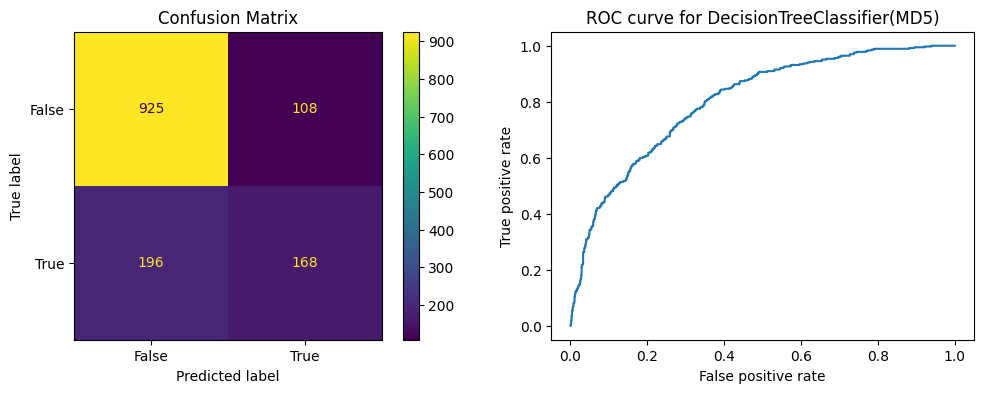

In [106]:
#Fit a Decision Tree Classifier on the training data.</li>
model_dt = DecisionTreeClassifier(max_depth=5)
model_name = "DecisionTreeClassifier(MD5)"
accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model_dt, X_train, X_test, y_train, y_test, results)
results

In [ ]:
#Compare the accuracy, precision, recall for&nbsp;the previous models on both the train and test sets.</l
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.792412,0.650407,0.439560,0.52459,204
0,KNeighborsClassifier(KNN5),0.768790,0.571429,0.450549,0.50384,200
0,DecisionTreeClassifier(MD5),0.782391,0.608696,0.461538,0.52500,196


In [ ]:
grid_search_results = pd.DataFrame(grid_search.cv_results_).rename(columns={'mean_test_score': 'mean_validation_score'})

px.line(grid_search_results, x='param_max_depth', y=['mean_validation_score', 'mean_train_score'],
        title="Learning curve of a decision tree classifier that exhibits overfitting", height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('variable=mean_validation_score' ... '}<br>value=%{y}<extra></extra>'),
              'legendgroup': 'mean_validation_score',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'mean_validation_score',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                          21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object),
              'xaxis': 'x',
              'y': array([0.67910308, 0.74927979, 0.78760555, 0.80482955, 0.81204891, 0.8011403 ,
                          0.78628962, 0.76630915, 0.74478978, 0.734833  , 0.71389476, 0.69755215,
                          0.6835376 , 0.67866411, 0.67279956, 0.66238591, 0.65439625, 0.65164984,
                          0.64645575, 0.64623532, 0.6447371 , 0.64432002, 0.64185105, 0.6461588 ,
                          0.64127339, 0.63921275, 0.64136313, 0.64316235, 0.63926226]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=mean_train_score<br>param_max_depth=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'mean_train_score',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'mean_train_score',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                          21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object),
              'xaxis': 'x',
              'y': array([0.68190504, 0.75366419, 0.79857815, 0.82457764, 0.83870335, 0.85422021,
                          0.87316763, 0.89435585, 0.91585785, 0.93561455, 0.95127707, 0.9653434 ,
                          0.97630277, 0.98430901, 0.99066078, 0.9943602 , 0.99672268, 0.9979544 ,
                          0.99865051, 0.99879772, 0.9991612 , 0.99938171, 0.99969196, 0.99970874,
                          0.99977422, 0.99979491, 0.99986275, 0.99985346, 0.99986933]),
              'yaxis': 'y'}],
    'layout': {'height': 600,
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Learning curve of a decision tree classifier that exhibits overfitting'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'param_max_depth'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [ ]:
def corr_matrix(data):
    correlations_matrix = data.select_dtypes(np.number).corr() # store our correlation matrix
    return correlations_matrix

correlations_matrix = corr_matrix(data)
correlations_matrix

,seniorcitizen,tenure,monthlycharges,totalcharges
seniorcitizen,1.000000,0.012308,0.217661,0.100167
tenure,0.012308,1.000000,0.238840,0.824550
monthlycharges,0.217661,0.238840,1.000000,0.648891
totalcharges,0.100167,0.824550,0.648891,1.000000


In [ ]:
data1= # bigger
data2=   #small


def data_oversampled(data2,data1):
    resample(data2, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(data1),#<- make both sets the same size
                                    random_state=0)
data2_oversampled = data_oversampled(data2,data1)
data_oversampled = pd.concat([data1 ,data2_oversampled],axis=0)


SyntaxError: invalid syntax (633305279.py, line 1)

<li>apply K-fold cross validation on your models&nbsp;built before,&nbsp;&nbsp;and check the model score. Note: So far we have not balanced the data.</li>
</ul>
<p style="font-size: 16px;"><strong>Round 4</strong></p>
<ul>
<li>fit a Random forest Classifier on the data and compare the accuracy.</li>
<li>tune the hyper parameters with Gridsearch and check the results. retrain the final mode with the best parameters found.</li>

score: 0.7673586256263422
accuracy score: 0.7673586256263422
precision_score: 0.5647840531561462
recall_score: 0.46703296703296704
170


,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.792412,0.650407,0.439560,0.524590,204
0,KNeighborsClassifier(KNN5),0.768790,0.571429,0.450549,0.503840,200
0,DecisionTreeClassifier(MD5),0.782391,0.608696,0.461538,0.525000,196
0,Logistic regression,0.792412,0.650407,0.439560,0.524590,204
0,Logistic regression,0.792412,0.650407,0.439560,0.524590,204
0,RandomForestClassifier,0.787402,0.642553,0.414835,0.504174,213
0,RandomForestClassifier,0.778812,0.723577,0.244505,0.365503,275
0,RandomForestClassifier,0.767359,0.564784,0.467033,0.511278,194
0,RandomForestClassifier,0.778812,0.723577,0.244505,0.365503,275
0,RandomForestClassifier,0.778812,0.723577,0.244505,0.365503,275


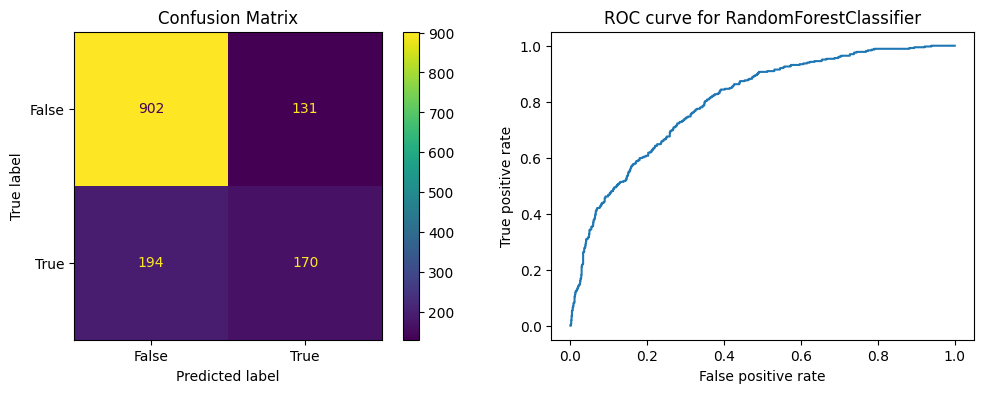

In [ ]:
model_rf = RandomForestClassifier( n_estimators=100, max_depth=None, random_state=1)
model_name = "RandomForestClassifier"
accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model_rf, X_train, X_test, y_train, y_test, results)
results


In [ ]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={'max_depth': range(1, 30)},
    cv=3,
    scoring='roc_auc',
    return_train_score=True,
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'max_depth': 5}

In [ ]:
grid_search.best_score_

0.8120154560547447

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [ ]:
# K-fold cross validation on your models&nbsp;built before,&nbsp;&nbsp;and check the model score. Note: So far we have not balanced the data.

from sklearn.metrics import make_scorer
scoring = {'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, X, y, scoring=scoring,
                        cv=5, return_train_score=True)
sorted(scores.keys())
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro',
 'train_prec_macro', 'train_rec_macro']
scores['train_rec_macro']
array([0.97, 0.99, 0.98, 0.98])
# Here is an example of cross_validate using a single metric:

scores = cross_validate(clf, X, y,
                       scoring='precision_macro', cv=5,
           return_estimator=True)
sorted(scores.keys())
['estimator', 'fit_time', 'score_time', 'test_score']

NameError: name 'clf' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

models = [model_dt, model_knn, model_lr]

# Specify the number of folds (e.g., 5)
num_folds = 5

# Create a stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model and perform cross-validation
for model in models:
    # Perform cross-validation and get the model scores
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Print the cross-validated scores for the current model
    print(f"Model: {type(model).__name__}")
    print("Cross-validated Scores:", scores)
    print(f"Mean Score: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print("\n")


NameError: name 'model_dt' is not defined

In [108]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


models = [model_dt, model_knn, model_lr]
num_folds = 5

# Create a stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Specify the scoring metrics you want to evaluate
scoring_metrics = ['accuracy', 'precision_score', 'recall_score', 'false_negatives']

# Loop through each model and evaluate
for model in models:
    print(f"Evaluating Model: {type(model).__name__}")
    results = evaluate_model(model, X, y, cv, scoring_metrics)
    print("\n")

Evaluating Model: DecisionTreeClassifier


NameError: name 'evaluate_model' is not defined

In [120]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


def evaluate_model(model, X, y, cv, scoring_metrics):
    results = {}

    for metric in scoring_metrics:
        if metric == 'precision_score':
            # Calculate precision scores
            precision_scores = []
            for train_idx, test_idx in cv.split(X, y):
                model.fit(X.iloc[train_idx], y.iloc[train_idx])
                y_pred = model.predict(X.iloc[test_idx])
                precision = precision_score(y.iloc[test_idx], y_pred)
                precision_scores.append(precision)
            mean_precision = sum(precision_scores) / len(precision_scores)
            results['precision_score'] = mean_precision
            print(f"Precision Score: {mean_precision:.4f}")
        else:
            # Use cross_val_score for other metrics
            scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
            mean_score = scores.mean()
            results[metric] = mean_score
            print(f"{metric}: {mean_score:.4f}")

    return results


# model_dt = DecisionTreeClassifier()
# model_knn = KNeighborsClassifier()
# model_lr = LogisticRegression()

# List of models
models = [model_dt, model_knn, model_lr]

# Specify the number of folds
num_folds = 5

# Create a stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Specify the scoring metrics you want to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Loop through each model and evaluate
for model in models:
    print(f"Evaluating Model: {type(model).__name__}")
    results = evaluate_model(model, X_train, y_train, cv, scoring_metrics)
    print("\n")


Evaluating Model: DecisionTreeClassifier
accuracy: 0.7209
precision: 0.4733
recall: 0.4738
f1: 0.4726


Evaluating Model: KNeighborsClassifier
accuracy: 0.7685
precision: 0.5813
recall: 0.4731
f1: 0.5205


Evaluating Model: LogisticRegression
accuracy: 0.7909
precision: 0.6539
recall: 0.4556
f1: 0.5367




In [ ]:
# Logistic Regression appears to be the best-performing model based on the selected metrics.